# Project_Name: Credit Card Fraud Detection

## Type of machine learning problem: Supervised Classification Technique

## Objective:

### To develop a machine learning model for detecting fraudulent credit card transactions by preprocessing and normalizing transaction data, addressing class imbalance through techniques like oversampling or undersampling, and partitioning the dataset into training and testing subsets to optimize model performance and accuracy.

### Dataset is already performed with Principal Component Analysis.  The feature extraction done by obtaining new component. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

In [2]:
df=pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
df.shape

(284807, 31)

In [4]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
len(df[df.duplicated()])

1081

## Exploratory Data Analysis

In [9]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [11]:
df.isnull().values.any()

False

In [12]:
LABELS=['Normal','Fraud']

Text(0, 0.5, 'FREQUENCY')

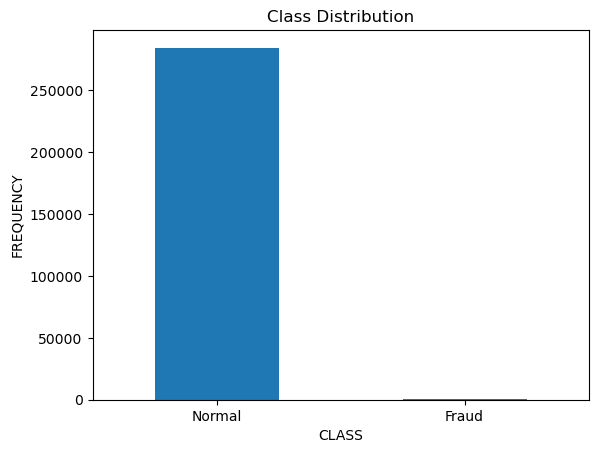

In [13]:
count_classes= pd.value_counts(df['Class'], sort=True)
count_classes.plot(kind='bar', rot=0)

plt.title('Class Distribution')

plt.xticks(range(2), LABELS)

plt.xlabel('CLASS')
plt.ylabel('FREQUENCY')

In [14]:
Fraud=df[df['Class']==1]

Normal=df[df['Class']==0]

In [15]:
print(Fraud.shape, Normal.shape)

(492, 31) (284315, 31)


In [16]:
Fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

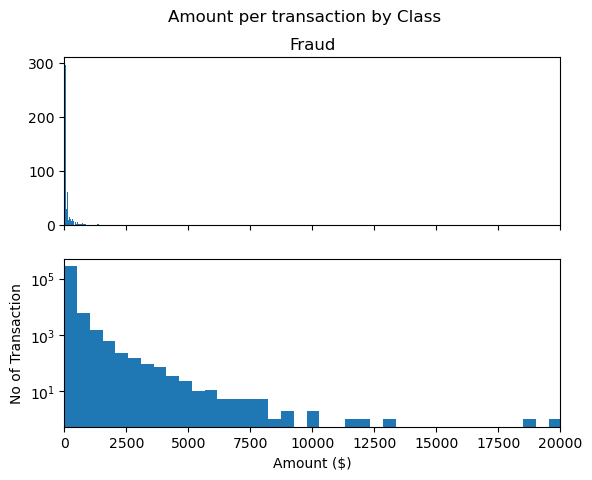

In [17]:
f, (ax1, ax2)= plt.subplots(2,1,sharex=True)
f.suptitle('Amount per transaction by Class')
bins=50
ax1.hist(Fraud.Amount, bins=bins)
ax1.set_title('Fraud')
ax2.hist(Normal.Amount, bins=bins)

plt.xlabel('Amount ($)')
plt.ylabel('No of Transaction')
plt.xlim((0,20000))
plt.yscale('log')
plt.show();


### Checking Outlier

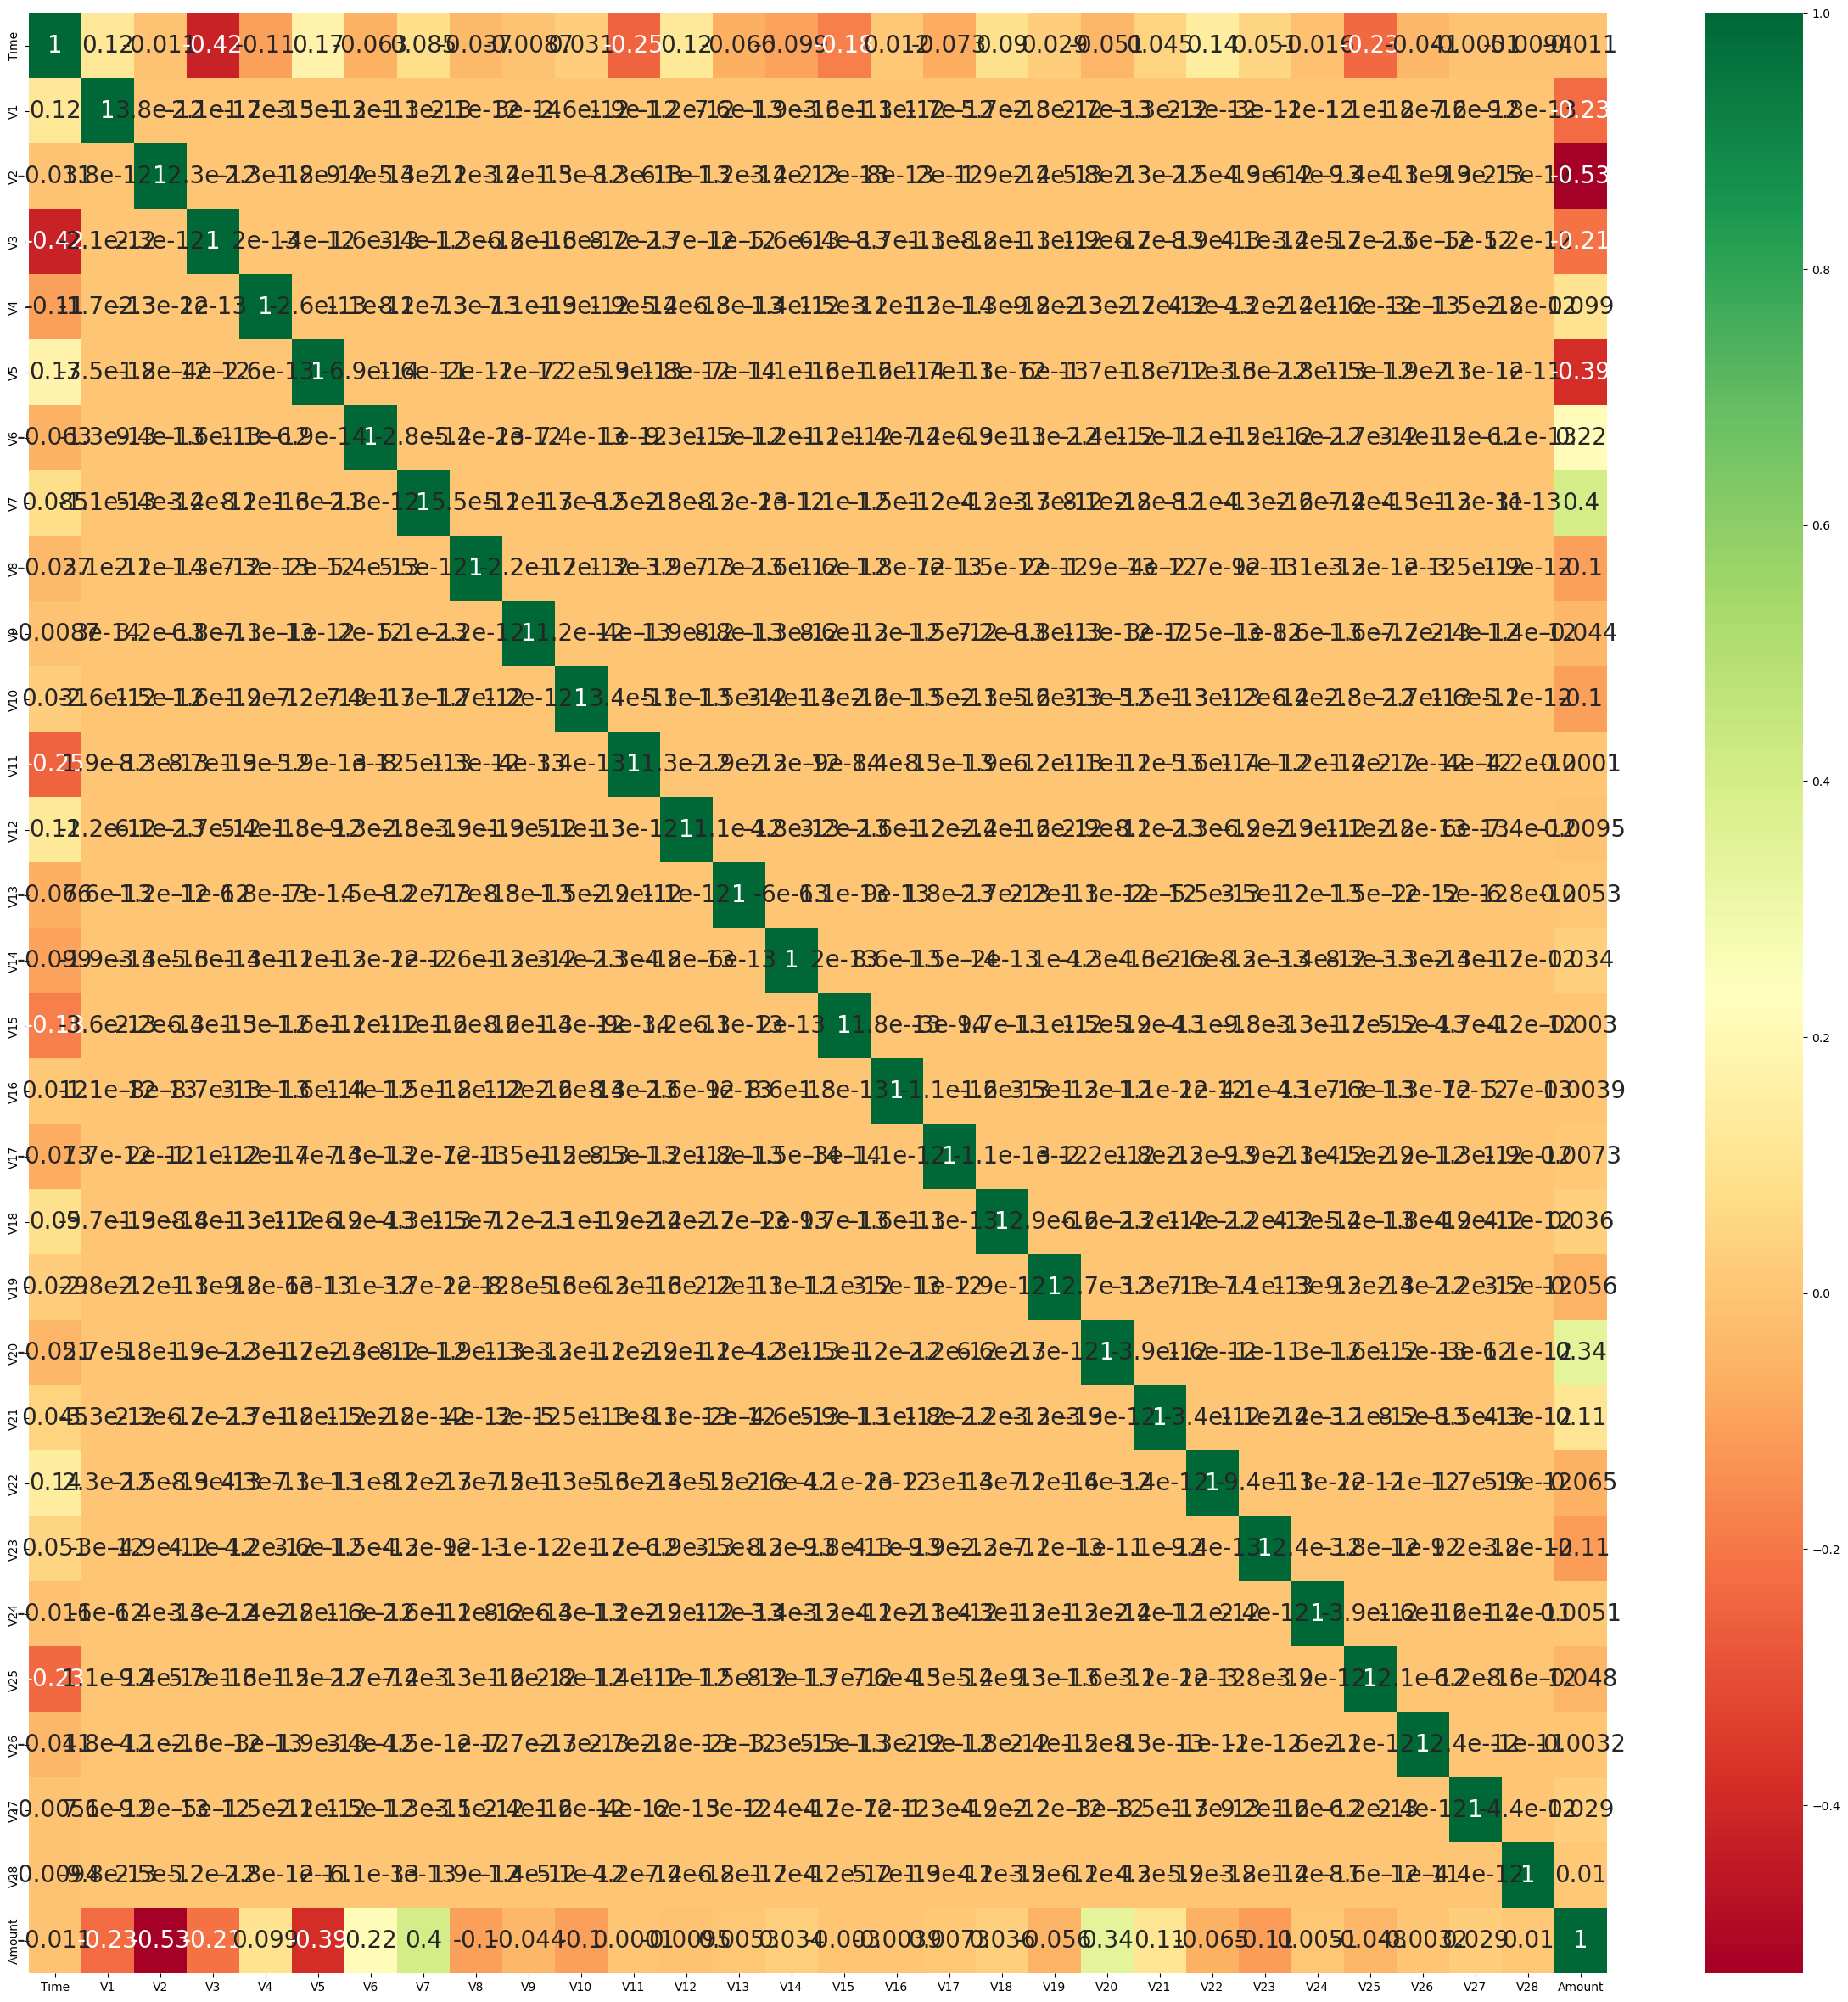

In [10]:
plt.figure(figsize= (30,30))
sns.heatmap(df.drop('Class',axis=1).corr(),annot=True,cmap="RdYlGn", annot_kws={"size":20})
plt.show()

### Model Creation

In [3]:
df.shape

(284807, 31)

In [3]:
data=df.sample(frac=0.1, random_state=1)
data.shape

(28481, 31)

In [4]:
X=data.drop('Class', axis=1)
Y=data.Class

### Balancing the data before Train Test

In [15]:
from imblearn.over_sampling import SMOTE
from collections import Counter
smote=SMOTE()

x_sm,y_sm= smote.fit_resample(X,Y)
print('original', Counter(Y))
print('smote', Counter(y_sm))

original Counter({0: 28432, 1: 49})
smote Counter({0: 28432, 1: 28432})


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,test_size=0.3,random_state=45)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(39804, 30)
(17060, 30)
(39804,)
(17060,)


In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score,classification_report

### Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
model_LR=LogisticRegression()
model_LR.fit(x_sm,y_sm)
y_pred= model_LR.predict(x_test)
y_p_train=model_LR.predict(x_sm)

In [12]:
pd.crosstab(y_test, y_pred)

col_0,0,1
Class,,
0,8294,361
1,507,7898


In [13]:
acc=accuracy_score(y_test, y_pred)  #test
print(acc)
recall=recall_score(y_test, y_pred)
print(recall)
precision= precision_score(y_test, y_pred)
print(precision)
f1score= f1_score(y_test, y_pred)
print(f1score)

print('\n')

acc=accuracy_score(y_sm, y_p_train)  #train
print(acc)
recall=recall_score(y_sm, y_p_train)
print(recall)
precision= precision_score(y_sm, y_p_train)
print(precision)
f1score= f1_score(y_sm, y_p_train)
print(f1score)



0.9491207502930832
0.9396787626412849
0.9562901077612301
0.9479116658665386


0.9485966516601013
0.9389772087788407
0.9573964497041421
0.9480973773460943


### Support Vector Machine

In [15]:
from sklearn.svm import SVC

In [16]:
model_svclassifier=SVC()
model_svclassifier.fit(x_sm, y_sm)

SVC()

In [17]:
y_pred_svc=model_svclassifier.predict(x_test)
y_svc_train=model_svclassifier.predict(x_sm)

In [18]:
pd.crosstab(y_test, y_pred_svc)

col_0,0,1
Class,,
0,3103,5552
1,2036,6369


In [19]:
acc=accuracy_score(y_test, y_pred_svc)  #test
print(acc)
recall=recall_score(y_test, y_pred_svc)
print(recall)
precision= precision_score(y_test, y_pred_svc)
print(precision)
f1score= f1_score(y_test, y_pred_svc)
print(f1score)

print('\n')

acc=accuracy_score(y_sm, y_svc_train)  #train
print(acc)
recall=recall_score(y_sm, y_svc_train)
print(recall)
precision= precision_score(y_sm, y_svc_train)
print(precision)
f1score= f1_score(y_sm,y_svc_train)
print(f1score)

0.5552168815943728
0.757763236168947
0.5342672594580992
0.6266850339466693


0.5581211311198649
0.7522158131682611
0.5418683017051357
0.6299465398153193


### Decision Tree Classifier

In [20]:
from sklearn.tree import DecisionTreeClassifier
model_DTC=DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=1, min_samples_split=3, splitter='random')

model_DTC.fit(x_sm, y_sm)

y_pred_DTC= model_DTC.predict(x_test)
y_train_DTC= model_DTC.predict(x_sm)

In [21]:
pd.crosstab(y_test, y_pred_DTC)

col_0,0,1
Class,,
0,8579,76
1,47,8358


In [22]:
print('metrics on test data_DTC')
acc=accuracy_score(y_test, y_pred_DTC)  
print(acc)
recall=recall_score(y_test, y_pred_DTC)
print(recall)
precision= precision_score(y_test, y_pred_DTC)
print(precision)
f1score= f1_score(y_test, y_pred_DTC)
print(f1score)

print('\n')
print('metrics on train data_DTC')
acc=accuracy_score(y_sm, y_train_DTC) 
print(acc)
recall=recall_score(y_sm, y_train_DTC)
print(recall)
precision= precision_score(y_sm, y_train_DTC)
print(precision)
f1score= f1_score(y_sm,y_train_DTC)
print(f1score)

metrics on test data_DTC
0.9927901524032825
0.9944080904223677
0.9909888546359972
0.9926955282380189


metrics on train data_DTC
0.993018429938098
0.9944428812605515
0.9916178585206747
0.99302836069892


### Random Forest 

In [23]:
from sklearn.ensemble import RandomForestClassifier
model_RFC=RandomForestClassifier(n_estimators=100)
model_RFC.fit(x_sm, y_sm)

y_pred_RFC= model_RFC.predict(x_test)
y_train_RFC= model_RFC.predict(x_sm)

In [24]:
pd.crosstab(y_test, y_pred_RFC)

col_0,0,1
Class,,
0,8655,0
1,0,8405


In [25]:
print('metrics on test data_Random Forest')
acc=accuracy_score(y_test, y_pred_RFC)  
print('accuraccy score is:' ,(acc))
recall=recall_score(y_test, y_pred_RFC)
print('recall score is:',(recall))
precision= precision_score(y_test, y_pred_RFC)
print('precision score is:', (precision))
f1score= f1_score(y_test, y_pred_RFC)
print('f1 score is:',(f1score))
print('\n')
print('metrics on train data_Random Forest')
acc=accuracy_score(y_sm, y_train_RFC) 
print('accuraccy score is:' ,(acc))
recall=recall_score(y_sm, y_train_RFC)
print('recall score is:',(recall))
precision= precision_score(y_sm, y_train_RFC)
print('precision score is:', (precision))
f1score= f1_score(y_sm,y_train_RFC)
print('f1 score is:',(f1score))

metrics on test data_Random Forest
accuraccy score is: 1.0
recall score is: 1.0
precision score is: 1.0
f1 score is: 1.0


metrics on train data_Random Forest
accuraccy score is: 1.0
recall score is: 1.0
precision score is: 1.0
f1 score is: 1.0


### Gradient Boosting


In [26]:
from sklearn.ensemble import GradientBoostingClassifier
model_GBC=GradientBoostingClassifier()
model_GBC.fit(x_sm, y_sm)
y_pred_GBC= model_GBC.predict(x_test)
y_train_GBC=model_GBC.predict(x_sm)


In [27]:
pd.crosstab(y_test, y_pred_GBC)   

col_0,0,1
Class,,
0,8648,7
1,0,8405


In [28]:
print('metrics on test data_GradientBoosting')
acc=accuracy_score(y_test, y_pred_GBC)  
print('accuraccy score is:' ,(acc))
recall=recall_score(y_test, y_pred_GBC)
print('recall score is:',(recall))
precision= precision_score(y_test, y_pred_GBC)
print('precision score is:', (precision))
f1score= f1_score(y_test, y_pred_GBC)
print('f1 score is:',(f1score))
print('\n')


print('metrics on train data_GradientBoosting')
acc=accuracy_score(y_sm, y_train_GBC)  
print('accuraccy score is:' ,(acc))
recall=recall_score(y_sm, y_train_GBC)
print('recall score is:',(recall))
precision= precision_score(y_sm, y_train_GBC)
print('precision score is:', (precision))
f1score= f1_score(y_sm,y_train_GBC)
print('f1 score is:',(f1score))

metrics on test data_GradientBoosting
accuraccy score is: 0.9995896834701055
recall score is: 1.0
precision score is: 0.999167855444603
f1 score is: 0.9995837545341023


metrics on train data_GradientBoosting
accuraccy score is: 0.9994548396173326
recall score is: 1.0
precision score is: 0.9989108667392755
f1 score is: 0.9994551366552422


### Extreme Gradient Boosting

In [29]:
from xgboost import XGBClassifier
model_xgc=XGBClassifier()

model_xgc.fit(x_sm, y_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [30]:
y_pred_xgc= model_xgc.predict(x_test)
y_train_xgc=model_xgc.predict(x_sm)


In [31]:
pd.crosstab(y_test, y_pred_xgc)  

col_0,0,1
Class,,
0,8655,0
1,0,8405


In [32]:
print('metrics on test data_Extreme Gradient Boosting')
acc=accuracy_score(y_test, y_pred_xgc)  
print('accuraccy score is:' ,(acc))
recall=recall_score(y_test, y_pred_xgc)
print('recall score is:',(recall))
precision= precision_score(y_test, y_pred_xgc)
print('precision score is:', (precision))
f1score= f1_score(y_test, y_pred_xgc)
print('f1 score is:',(f1score))
print('\n')


print('metrics on train data_Extreme Gradient Boosting')
acc=accuracy_score(y_sm, y_train_xgc) 
print('accuraccy score is:' ,(acc))
recall=recall_score(y_sm, y_train_xgc)
print('recall score is:',(recall))
precision= precision_score(y_sm, y_train_xgc)
print('precision score is:', (precision))
f1score= f1_score(y_sm,y_train_xgc)
print('f1 score is:',(f1score))

metrics on test data_Extreme Gradient Boosting
accuraccy score is: 1.0
recall score is: 1.0
precision score is: 1.0
f1 score is: 1.0


metrics on train data_Extreme Gradient Boosting
accuraccy score is: 1.0
recall score is: 1.0
precision score is: 1.0
f1 score is: 1.0


### Detailed Project Report

In [9]:
results=pd.DataFrame({
    'Model':['Logistic Regression', 'Support Vector Machines',
            'Decision Tree', 'Random Forest','Gradient Boosting',
            'Extreme Gradient Boosting'],
    'score':[94,55,99,100,99,100]})

result_data=results.sort_values(by='score', ascending=False)
result_data=result_data.set_index('score')
result_data.head(8)

,Model
score,
100,Random Forest
100,Extreme Gradient Boosting
99,Decision Tree
99,Gradient Boosting
94,Logistic Regression
55,Support Vector Machines


### Observation

* After balancing the data using the SMOTE technique, we achieved better results with 100% accuracy on both the Random Forest and Extreme Gradient Boosting models.

## Isolation Forest Algorithm

#### One of the newest techniques to detect outliers is called Isolation Forest Algorithm. The algorthm is based on the fact that outliers are data points that are few and different.  As a result of these properties, Outliers are susceptable to a mechanism called Isolation.

#### How Isolation Forest works: The isolation Forest Algorithm isolates observations by randomly selecting a feature and then randomly selecting a split value.




### Local Outlier Factor Algorithm

#### The LOF Algorithm is an unsuervised outlier detection method which comutes the local density deviation of a given data point with respect to its neighbors.  It considers as outlier samples that have a substantially lower density than their neighbors.

#### The number of neighbors considered (parameter n_neighbors) is typicaly chosen 
1. Greater than minimum the no of objects a cluster has to contain.
2. Smaller than maximum no of close by objects that can potentially be local outliers.  

##### In practice such information not available, n_neighbors=20 appears to work well in general.

In [24]:
from sklearn.ensemble import IsolationForest

In [6]:
from sklearn.neighbors import LocalOutlierFactor

In [9]:
data1=df.sample(frac=0.1, random_state=1)
data1.shape

(28481, 31)

In [10]:
data1.shape

(28481, 31)

In [11]:
Fraud=data1[data1['Class']==1]

Normal=data1[data['Class']==0]

In [12]:
outlier_fraction=len(Fraud)/float(len(Normal))

In [13]:
print(outlier_fraction)

print('Fraud cases: {}'.format(len(Fraud)))

print('Normal cases: {}'.format(len(Normal)))


0.0017234102419808666
Fraud cases: 49
Normal cases: 28432


In [14]:
X=data1.drop('Class', axis=1)
Y=data1.Class
state=np.random.RandomState(42)
X_outliers=state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))

In [15]:
from sklearn.svm import OneClassSVM

model = OneClassSVM(kernel='rbf', degree=3, gamma=0.1, nu=0.05, max_iter=-1)


In [16]:
import random

In [19]:
#define the outlier detection methods

classifiers={
    'Isolation Forest': IsolationForest(n_estimators=100, max_samples=len(X),
                                       contamination=outlier_fraction, random_state=state, verbose=0),
    'Local Outlier Factor': LocalOutlierFactor(n_neighbors=20, algorithm='auto',
                                              leaf_size=30, metric='minkowski',
                                               p=2, metric_params=None, contamination=outlier_fraction)
}

In [23]:
n_outliers=len(Fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #fit the data and tag outliers
    if clf_name == 'Local Outlier Factor':
        y_pred=clf.fit_predict(X)
        scores_prediction=clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_prediction=clf.decision_function(X)
        y_pred=clf.predict(X)
    #Reshape the prediction values to 0 for valid transactions, 1 for Fraud transactions
    y_pred[y_pred==1]= 0
    y_pred[y_pred==-1]=1
    n_errors=(y_pred != Y).sum()
    #Run classification Metrics
    print('{}:{}'.format(clf_name, n_errors))
    print('Accuracy Score :')
    print(accuracy_score(Y,y_pred))
    print('Classification Report :')
    print(classification_report(Y,y_pred))

Isolation Forest:75
Accuracy Score :
0.9973666654962958
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.24      0.24      0.24        49

    accuracy                           1.00     28481
   macro avg       0.62      0.62      0.62     28481
weighted avg       1.00      1.00      1.00     28481

Local Outlier Factor:97
Accuracy Score :
0.9965942207085425
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.02      0.02      0.02        49

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481



# Observations:

* After balancing the data using the SMOTE technique, we achieved better results with 100% accuracy on both the Random Forest and Extreme Gradient Boosting models.



* Isolation Forest detected 73 errors versus Local Outlier detecting 97 errors.
* Isolation Forest has a 99.7% accuracy than Local Outlier Factor of 99.6%.
* when comparing error precision & recall for 2 models, the Isolation Forest Performed much better than the LOF.
* So overall Isolation Forest performed much better in determining the fraud cases.
